# Оценка метрик качества базовой модели

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import set_config

set_config(display='diagram')

In [21]:
from titanic.data.make_dataset import load_titanic
from titanic.data.validation import train_test_split
from titanic.models.train import make_baseline_model

titanic = load_titanic()
train, test = train_test_split(titanic)
y_train = train['Survived']
y_test = test['Survived']

baseline_clf = make_baseline_model()
baseline_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('Onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass'])])),
                ('classifier', LogisticRegression())])

## Обучение модели

In [22]:
%%time
baseline_clf.fit(train, y_train);

CPU times: user 17.3 ms, sys: 2.12 ms, total: 19.5 ms
Wall time: 18.4 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('Onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass'])])),
                ('classifier', LogisticRegression())])

## Оценка метрик

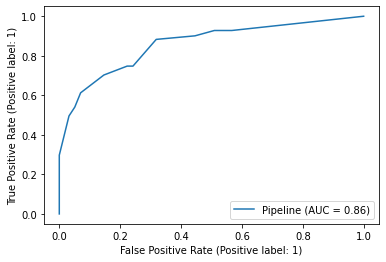

In [24]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(baseline_clf, test, y_test);